# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Destiani Intan Cendani
- Email: destianiic@gmail.com
- Id Dicoding: dicendani

## Persiapan

### Menyiapkan library yang dibutuhkan

In [37]:
!pip install pandas matplotlib seaborn scikit-learn

In [38]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import joblib

### Menyiapkan data yang akan diguankan

## Data Understanding

In [39]:
# URL of the raw file on GitHub
url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv'

# Load the dataset
df = pd.read_csv(url)

# Check the first few rows
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [40]:
# Dataset shape
print("Jumlah baris dan kolom:", df.shape)

# Data types and non-null counts
df.info()

Jumlah baris dan kolom: (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            14

In [41]:
# Check for missing data
df.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


Distribusi Attrition:
 Attrition
0.0    879
1.0    179
Name: count, dtype: int64

Persentase Attrition:
 Attrition
0.0    83.081285
1.0    16.918715
Name: proportion, dtype: float64


<ipython-input-42-baa351487151>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette='Set2')


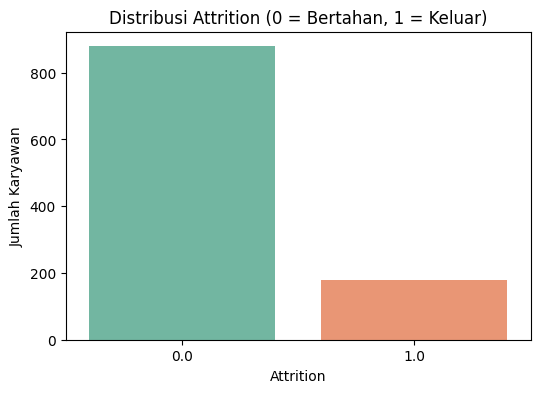

In [42]:
# Value counts of attrition
attr_counts = df['Attrition'].value_counts()

# Convert to percent
attr_percent = df['Attrition'].value_counts(normalize=True) * 100

# Display
print("Distribusi Attrition:\n", attr_counts)
print("\nPersentase Attrition:\n", attr_percent)

# Plot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Attrition', palette='Set2')
plt.title('Distribusi Attrition (0 = Bertahan, 1 = Keluar)')
plt.xlabel('Attrition')
plt.ylabel('Jumlah Karyawan')
plt.show()

## Data Preparation / Preprocessing

In [43]:
# Copy the dataset to avoid changing the original
df_clean = df.copy()

In [44]:
# change 0/1 in Attrition column
df_clean['Attrition'] = df_clean['Attrition'].map({0: 'Bertahan', 1: 'Keluar'})

# chnage  Yes/No in OverTime column
df_clean['OverTime'] = df_clean['OverTime'].map({'Yes': 'Lembur', 'No': 'Tidak Lembur'})

In [45]:
# duplicate checking
print("Jumlah data duplikat:", df_clean.duplicated().sum())

# checking the missing values
print("Jumlah data null per kolom:\n", df_clean.isnull().sum())

Jumlah data duplikat: 0
Jumlah data null per kolom:
 EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYe

In [46]:
# missing values handling

df_clean = df_clean.dropna(subset=['Attrition'])
print(f"Jumlah data setelah penghapusan missing values di kolom 'Attrition': {df_clean.shape[0]}")

Jumlah data setelah penghapusan missing values di kolom 'Attrition': 1058


In [47]:
# check data type after drop some missing values

print(df_clean.dtypes)

EmployeeId                   int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [48]:
# change the dtype of Attrition to be categorical

df_clean['Attrition'] = df_clean['Attrition'].astype('category')

In [49]:
# dtype changing

categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
for col in categorical_columns:
    df_clean[col] = df_clean[col].astype('category')

In [50]:
# check dtype again

print(df_clean.dtypes)

EmployeeId                     int64
Age                            int64
Attrition                   category
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EmployeeCount                  int64
EnvironmentSatisfaction        int64
Gender                      category
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                      category
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StandardHours                  int64
S

In [51]:
# show all features
df_clean.describe(include="all")

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058,1058,1058.000000,1058,1058.000000,1058.000000,1058,1058.0,...,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
unique,NaN,NaN,2,3,NaN,3,NaN,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Bertahan,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,879,746,NaN,701,NaN,NaN,436,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,736.656900,37.055766,NaN,NaN,809.542533,NaN,8.978261,2.879017,NaN,1.0,...,2.726843,80.0,0.762760,11.435728,2.769376,2.763705,7.065217,4.26087,2.203214,4.142722
std,427.440538,9.410421,NaN,NaN,408.478049,NaN,8.040608,1.031442,NaN,0.0,...,1.090970,0.0,0.837537,8.016429,1.302689,0.707392,6.265227,3.61747,3.266948,3.599044
min,2.000000,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,364.250000,30.000000,NaN,NaN,465.250000,NaN,2.000000,2.000000,NaN,1.0,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,731.500000,36.000000,NaN,NaN,817.500000,NaN,7.000000,3.000000,NaN,1.0,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,1117.750000,43.000000,NaN,NaN,1168.500000,NaN,13.000000,4.000000,NaN,1.0,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.000000,7.000000


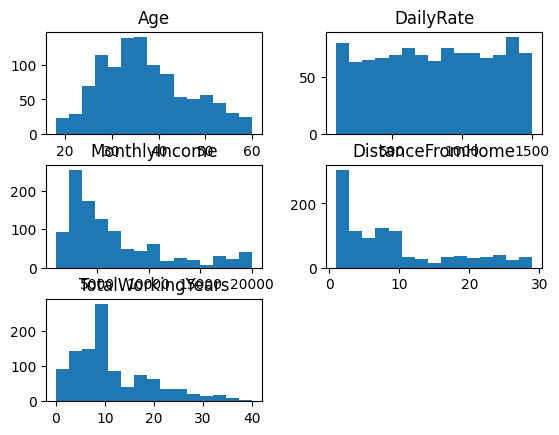

In [52]:
# showing histogram for numerical features

numerical = ["Age", "DailyRate", "MonthlyIncome", "DistanceFromHome", "TotalWorkingYears"]
df_clean[numerical].hist(bins=15, grid=False)
plt.show()

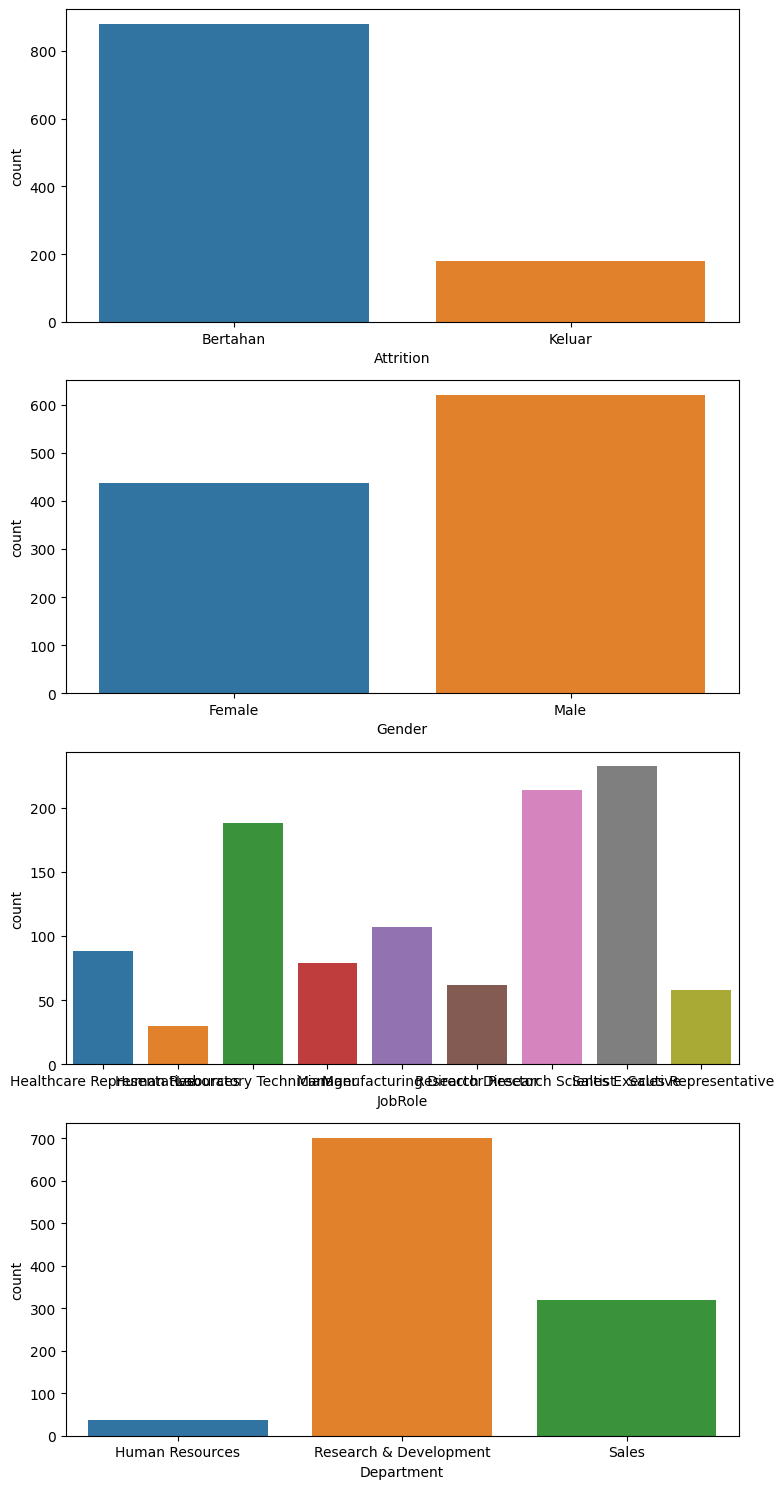

In [53]:
# categorical data type distribution

categorical = ["Attrition", "Gender", "JobRole", "Department"]
fig, ax = plt.subplots(len(categorical), 1, figsize=(8, 15))

for i, feature in enumerate(categorical):
    sns.countplot(data=df_clean, x=feature, hue=feature, ax=ax[i])
plt.tight_layout()
plt.show()

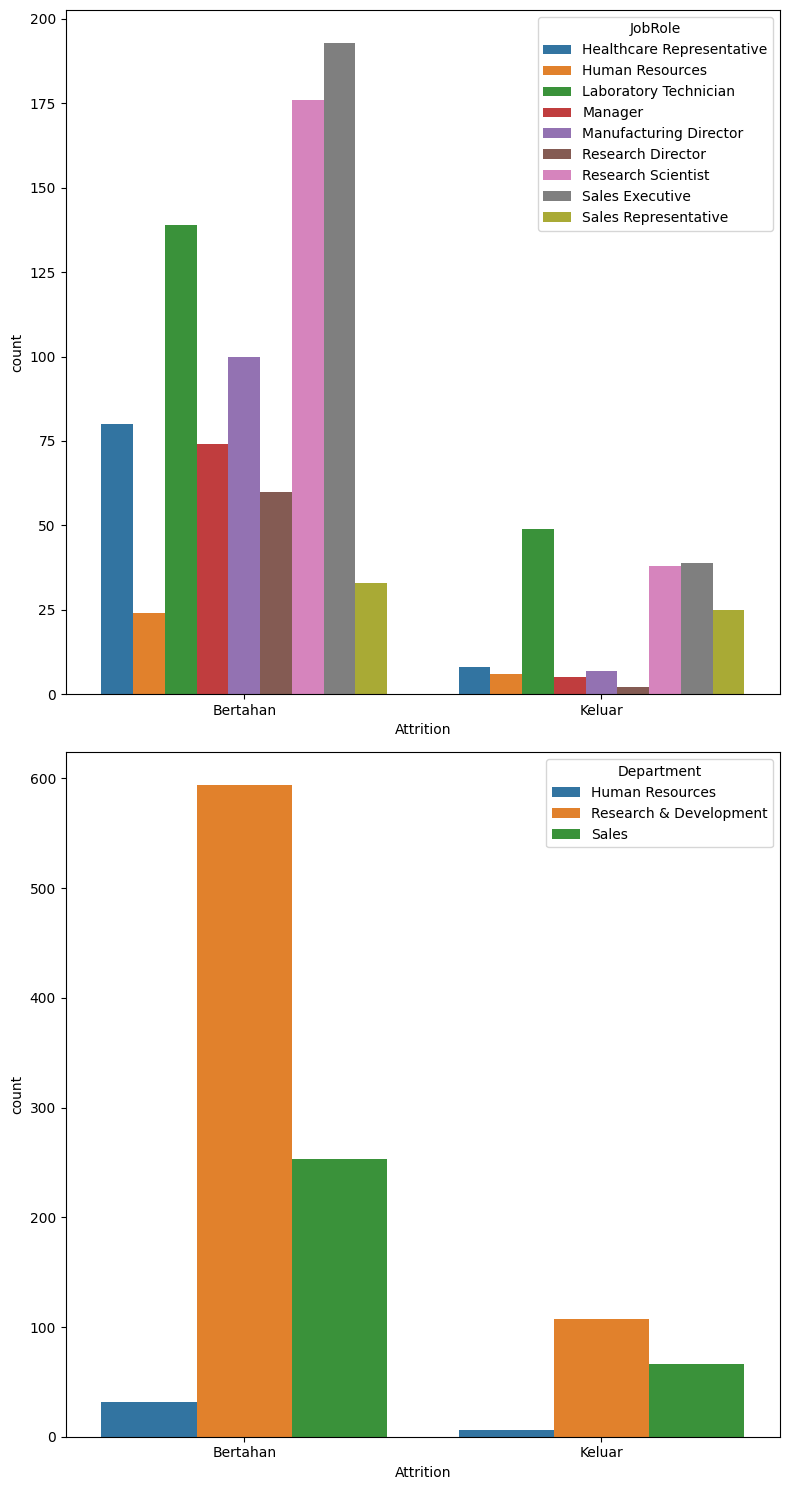

In [54]:
# data categorical distribution based group type

def categorical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1, figsize=(8, 15))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, x=segment_feature, hue=feature, ax=ax[i])
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
    plt.tight_layout()
    plt.show()

categorical_plot(
    features=["JobRole", "Department"],
    df=df_clean,
    segment_feature="Attrition"
)

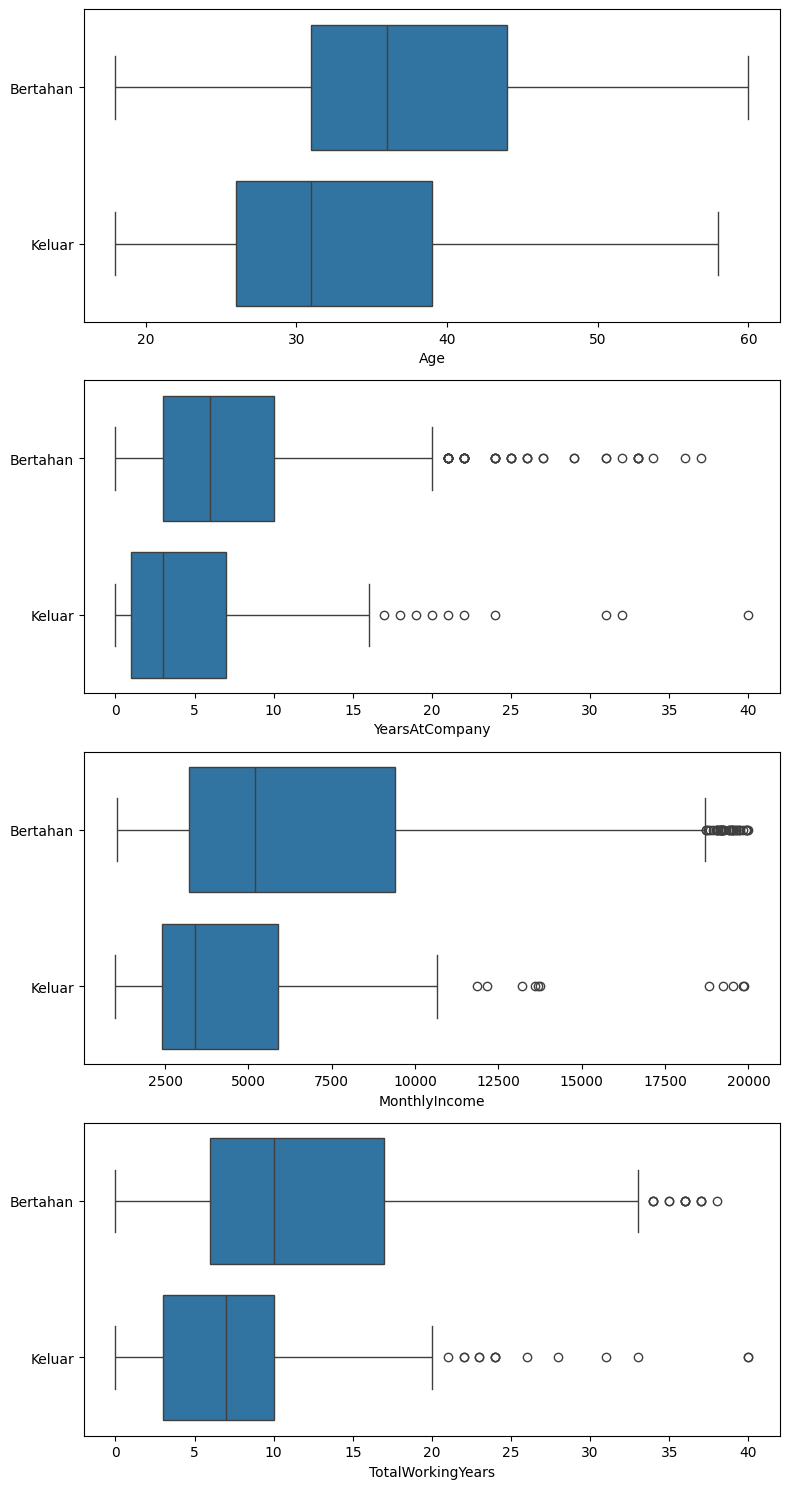

In [55]:
# data numeric distribution

def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1, figsize=(8, 15))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()

numerical_dis_plot(
    features=["Age", "YearsAtCompany", "MonthlyIncome", "TotalWorkingYears"],
    df=df_clean,
    segment_feature="Attrition"
)

## Modeling

In [56]:
# Separate features and target
X = df_clean.drop(columns=["Attrition"])
y = df_clean["Attrition"].map({'Bertahan': 0, 'Keluar': 1}).astype("int")

# Ensure X is numeric
print("Non-numeric columns before encoding:", X.select_dtypes(include='object').columns)

# If there are any left, apply one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Non-numeric columns before encoding: Index([], dtype='object')


In [57]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on train, transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
# Use scaled data and set higher max_iter
model = LogisticRegression(max_iter=2000)  # increase if needed
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000)

In [59]:
y_pred = model.predict(X_test_scaled)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8584905660377359

Confusion Matrix:
 [[166  10]
 [ 20  16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92       176
           1       0.62      0.44      0.52        36

    accuracy                           0.86       212
   macro avg       0.75      0.69      0.72       212
weighted avg       0.85      0.86      0.85       212



## Evaluation

In [60]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.8584905660377359


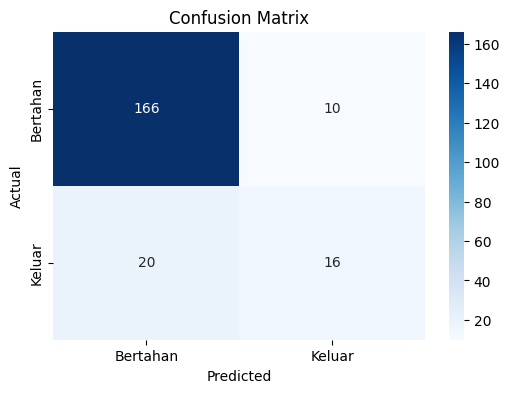

In [61]:
# confussion matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bertahan', 'Keluar'], yticklabels=['Bertahan', 'Keluar'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [62]:
# classification report

print(classification_report(y_test, y_pred, target_names=['Bertahan', 'Keluar']))

              precision    recall  f1-score   support

    Bertahan       0.89      0.94      0.92       176
      Keluar       0.62      0.44      0.52        36

    accuracy                           0.86       212
   macro avg       0.75      0.69      0.72       212
weighted avg       0.85      0.86      0.85       212



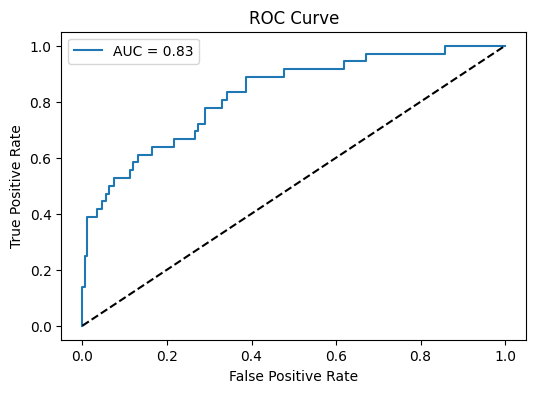

In [63]:
# visualize ROC Curve

y_prob = model.predict_proba(X_test_scaled)[:, 1]  # probabilities for class "1"
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [64]:
# deployment

joblib.dump(model, 'logistic_model.pkl')

['logistic_model.pkl']

In [65]:
from google.colab import files

# Download the saved file
files.download('logistic_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>